### Required Imports 

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt

## Q1)

The code below is the solution for Q1, the implementation details are given in the code in the form of comments

In [111]:
def f(*x,**y):
    
    def s1(x):
        s=0
        if x:
            for i in x:
                s+=i
        return s
    
    def p1(x):
        s =1
        if x:
            for i in x:
                s*=i
        return s
    
    if y['action']=='sum':
        return s1(*x)
    elif y['action']=='prod':
        return p1(*x)
    elif y['action']=='reciprocal sum':
        
        '''
        Essentially, what we do in the line below is map all the values in the array 'x' to their reciprocal using
        the lambda fucntion in conjunction with the map function, the map object is then converted to a list
        so as to return the output in list format which can be sent to the function s1() that expects a list.
        
        NOTE : We use *x here as when using '*args' in python returns a tuple ([1,2,3,4,5],) and we require
        only the array that is in the 0th index of the tuple, unpacking this using the '*' operator yields 
        the intended list [1,2,3,4,5]. 
        Alternatively, we can also use x[0] and it would yield the same output 
        as x[0] returns the 0th element of the tuple which is the required list. 
        ''' 
        
        return s1(list(map(lambda k: 1/k , *x)))
    else:
        return f'bad argument :{y}'
        

In [120]:
xlst = [x for x in range(1,6)] # creating a list [1,2,3,4,5]
print("The array being used is :",xlst,"\n")

# Testing all the functions in the program

print("Sum of list : ",f(xlst,action='sum'))
print("Product of list : ",f(xlst,action='prod'))
print("Reciprocal Sum of list : ",f(xlst,action='reciprocal sum'))

The array being used is : [1, 2, 3, 4, 5] 

Sum of list :  15
Product of list :  120
Reciprocal Sum of list :  2.283333333333333


## Q2)
The code below is the solution for Q1. The only difference we can observe from ***Q1)*** is that we make use of argparse to accept user input in the form of named commandline arguments.

#### Explanation :
- Based on the documentation on https://docs.python.org/3/library/argparse.html#nargs : The ***'nargs'*** keyword argument associates a different number of command-line arguments with a single action. Here we have used ***nargs='+'*** which allows us to accept one or more inputs until it encounters another option flag.
- Another thing we handle while taking the input is the datatype, argparse assumes all inputs as strings whereas we require integers to perform our calculations here. The parameter ***'type'*** helps us to accept integer input. We set type = 'int'  
- We also make use of a help flag that displays helpful information to the user when the user uses the --help or -h flag
- We also include a default list that consists of the just one element '1' in case the user provides no input for the list as we can observe in the last line of the output in the screenshot below.

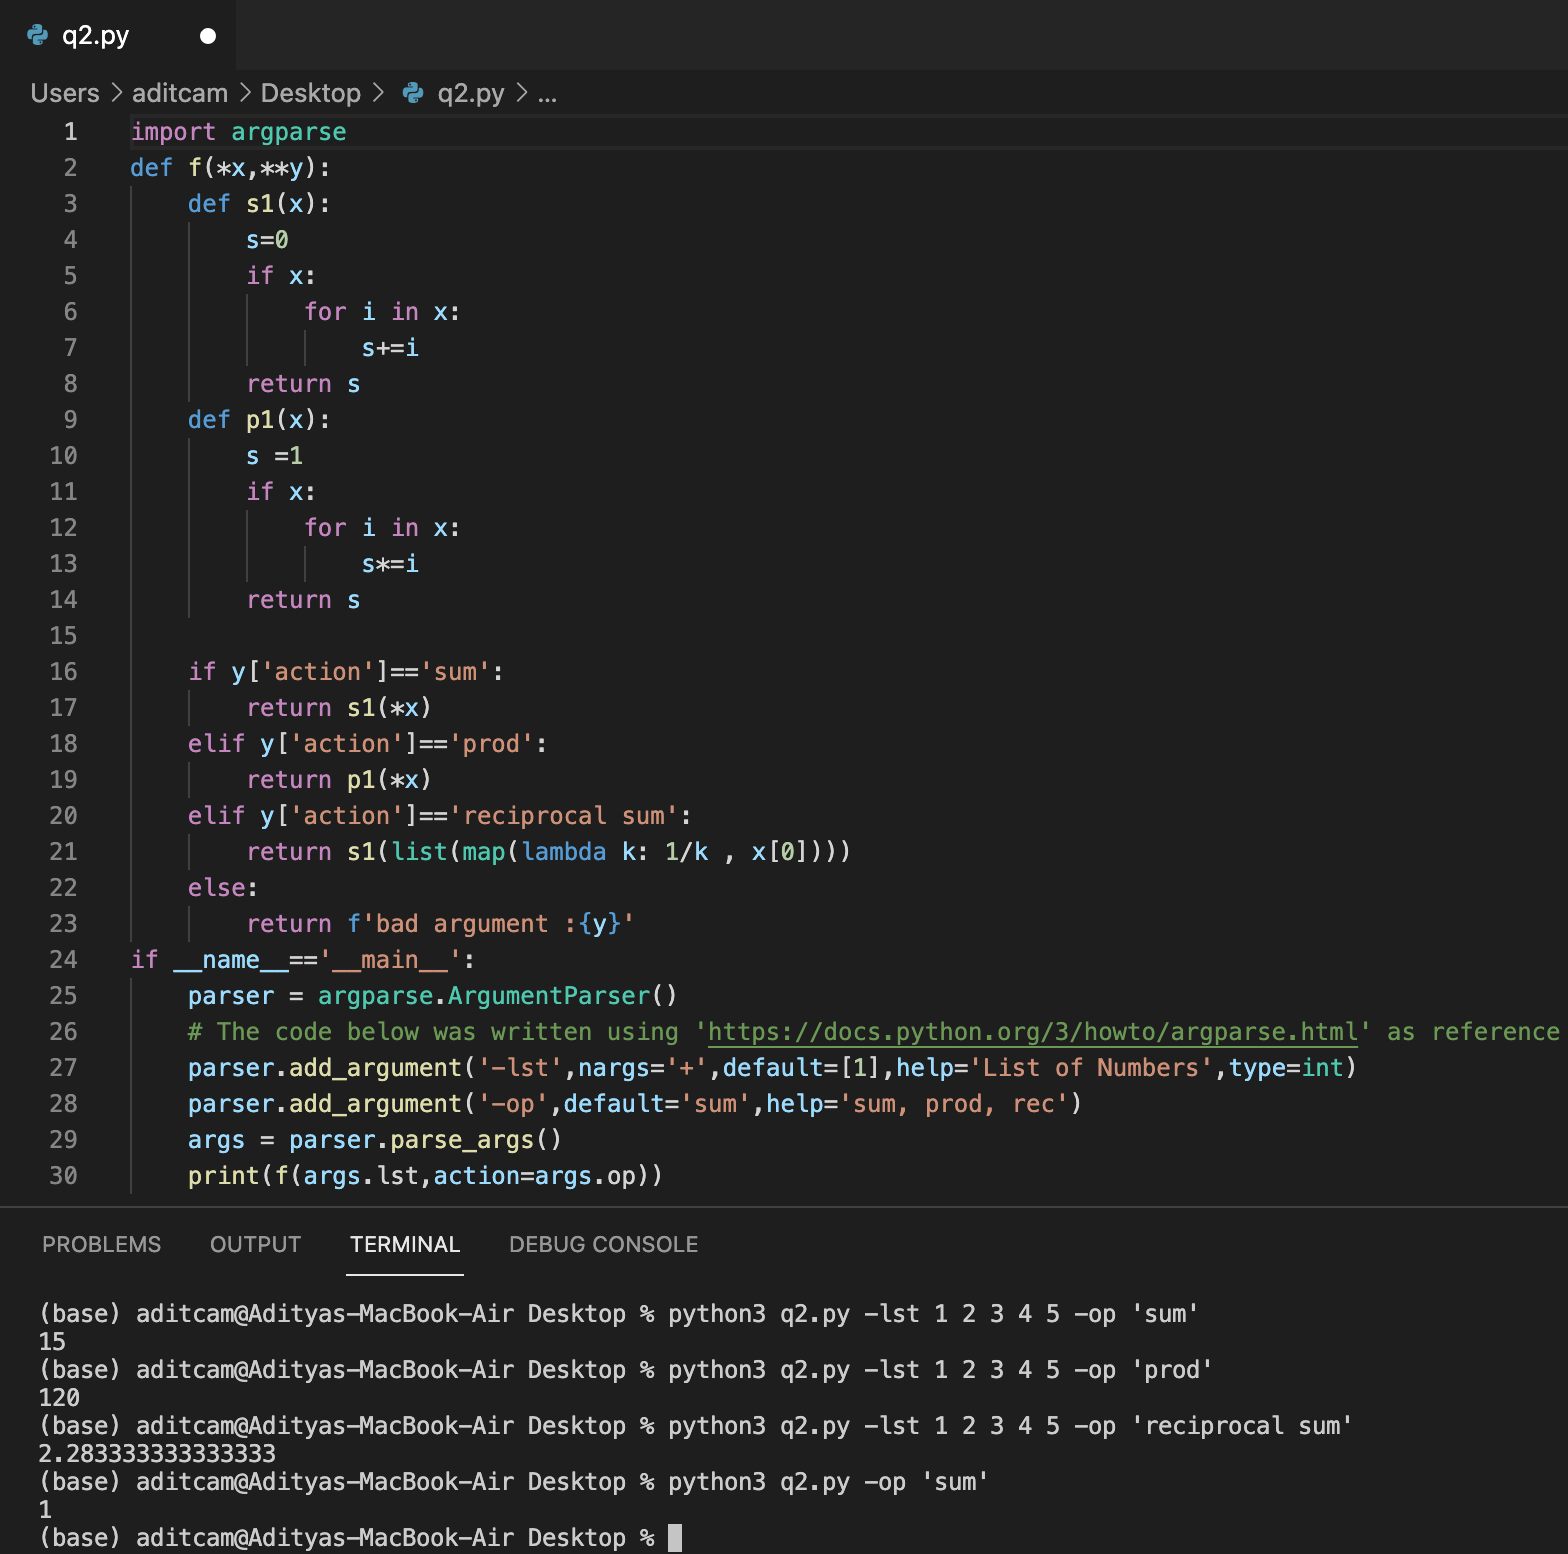

### Q3)

***Explanation*** :


- In this question our objective is to override the default inbuilt multiplication ( \* ) function for a python class. We accomplish this by creating a 'cmul' function to test the functionality with the help of function calls. Once this is done, we then proceed to implement a function that will work with the inbuilt python methods using \* operator.
- We override the contents of the \__mul__ inbuilt python function to multiply using the \*  operator
- How the multiplication works : basically we divide our output into two parts, namely the real part and imaginary part. Their values are derived using the following formulae (Lets assume the 2 imaginary numbers to be multiplied are A & B) :
***Real output** = real_part(A) * real_part(B) + imaginary_part(A) * imaginary_part(B) * (-1)
***Imaginary output** = real_part(A) * imaginary_part(B) + imaginary_part(A) * real_part(B)

**NOTE** : the (-1) is multiplied as i^2 (i raised to the power 2) is equal to '-1'


In [107]:
class complex_:
    def __init__(self, re=0, im=0):
        self.re = re
        self.im = im
    
    def get_re(self):
        return self.re

    def get_im(self):
        return self.im

    def __str__(self):
        g = lambda x:"+" if x >= 0 else ""
        return f"({self.re}{g(self.im)}{self.im}i)"

    def cadd(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)
    
    def cmul(self, other):
        new_re = self.get_re() * other.get_re() + self.get_im() * other.get_im() * (-1)
        new_im = self.get_re() * other.get_im() + self.get_im() * other.get_re()
        return complex_(new_re, new_im)

    def __add__(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)
    
    # overriding the inbuilt function
    def __mul__(self,other):
        new_re = self.get_re() * other.get_re() + self.get_im() * other.get_im() * (-1)
        new_im =  + self.get_re() * other.get_im() + self.get_im() * other.get_re()
        return complex_(new_re, new_im)

In [123]:
    w = complex_(1,-3)
    x = complex_(-1,3)
    y = complex_(1,3)
    z = complex_(-1,-3)
    
    print("The complex numbers are -")
    print(w)
    print(x)
    print(y)
    print(z,"\n")
    
    print("The addition output is -")
    print(w.cadd(x).cadd(y).cadd(z))
    print((1-3j) + (-1+3j) + (1+3j) + (-1-3j))
    print(w + x + y + z,"\n")
    
    # verifying the output of overriden function with python's inbuilt complex number multiplication
    print("The multiplication output is -")
    print(w.cmul(x).cmul(y).cmul(z))
    print((1-3j) * (-1+3j) * (1+3j) * (-1-3j))
    print(w * x * y * z)
    
    

The complex numbers are -
(1-3i)
(-1+3i)
(1+3i)
(-1-3i) 

The addition output is -
(0+0i)
0j
(0+0i) 

The multiplication output is -
(100+0i)
(100+0j)
(100+0i)


### Q4 (Experimental Analysis)

The Following functions compute the cumulative averages until each index of the sequence

**Analysis:**

average1(S): 

Average 1 function

In [3]:
def average1(S):

  # S:sequence

    n = len(S)
    my_average = [0] * n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        my_average[j] = total / (j + 1)
    return my_average

Average 2 function

In [4]:
def average2(S):

  # S:sequence

    n = len(S)
    my_average = [0] * n
    for j in range(n):
        my_average[j] = sum(S[0:j + 1]) / (j + 1)
    return my_average


Average 3 function

In [5]:
def average3(S):

 # S:sequence

    n = len(S)
    my_average = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        my_average[j] = total / (j + 1)
    return my_average


In [6]:
time_axis_1 = []
time_axis_2 = []
time_axis_3 = []
input_size = [10**x for x in range(5)]

In [7]:
dict_size = {}
for i in input_size:
    dict_size[i] = np.random.randint(1,101,i)

In [8]:
for arr in dict_size.values():
    start = time.time()
    average1(arr)
    end = time.time()
    time_axis_1.append(end-start)

In [9]:
for arr in dict_size.values():
    start = time.time()
    average2(arr)
    end = time.time()
    time_axis_2.append(end-start)

In [10]:
for arr in dict_size.values():
    start = time.time()
    average3(arr)
    end = time.time()
    time_axis_3.append(end-start)

#### Log Scale Plot

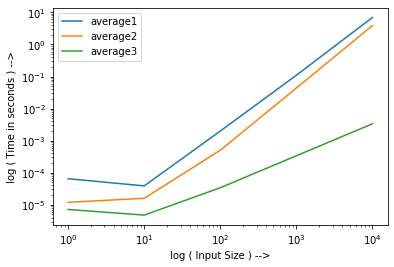

In [16]:
plt.ylabel(" log ( Time in seconds ) --> ")
plt.xlabel(" log ( Input Size ) --> ")
plt.xscale("log")
plt.yscale("log")
plt.plot(input_size,time_axis_1)
plt.plot(input_size,time_axis_2)
plt.plot(input_size,time_axis_3)
plt.legend(["average1","average2", "average3"], loc ="upper left")

#### Regular Scale Plot

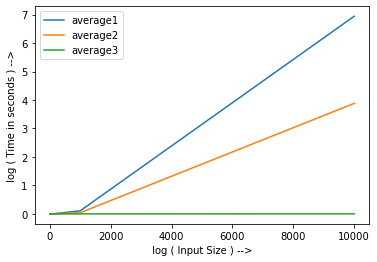

In [17]:
plt.ylabel(" Time in seconds --> ")
plt.xlabel(" Input Size --> ")
# plt.xscale("log")
# plt.yscale("log")
plt.plot(input_size,time_axis_1)
plt.plot(input_size,time_axis_2)
plt.plot(input_size,time_axis_3)
plt.legend(["average1","average2", "average3"], loc ="upper left")

### Q5 (Experimental Analysis)

#### In this section we attempt to find the largest possible input that allows us to run the code for 45 seconds for each of the algorithms 1,2 and 3.

**Explanation:**

- We created a helper function called 'exp_analysis' that runs each algorithm in a loop and basically finds out the closest input value size wherein the program runs for less than 45 seconds. The 'exp_analysis' function accepts the following parameters 
  - func:"function to test"
  - arr_size:"size of the array to test"
  - inc:"amount to increment array size by for each new iteration"
  - dec:"amount to decrement array size by for each new iteration"
- For a given algorithm (eg. algorithm1) 'exp_analysis' runs the algorithm multiple times for different input array sizes while measuring the time. In order to reach the target time of 45 seconds quickly we had to manually adjust the values for increment variable, generally larger values got closer to 45 seconds quicker. The drawback however was that we often surpassed the 45 seconds mark as the increments were large. 

  To combat this and get a more accurate estimate below 45 seconds, once our code runtime crossed 45 seconds, we broke the loop and started decreasing our input array sizes in smaller decrements and once again timed the algorithm, once the algorithm took less than 45 seconds to run 

In [3]:
def algorithm1(S):
    #S:sequence
    for j in range(len(S)):
        for k in range(j+1, len(S)):
             if S[j] == S[k]:
                return False
    return True

In [4]:
def algorithm2(S):
    S= sorted(S)
    for j in range(1, len(S)):
        if S[j-1] == S[j]:
            return False
    return True

In [5]:
def algorithm3(S, start, stop):
    #slice S[start:stop],  S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]

In [124]:
def plot_graph_log(*data_dict):
    plt.ylabel(" log ( Time in seconds ) --> ")
    plt.xlabel(" log ( Input Size ) --> ")
    plt.xscale("log")
    plt.yscale("log")
    for dict_ in data_dict:
        input_size = list(dict_.keys())
        time_axis = list(dict_.values())
        plt.plot(input_size,time_axis)
    plt.legend(["algorithm1","algorithm2", "algorithm3"], loc ="upper left")

In [128]:
def plot_graph(*data_dict):
    plt.ylabel(" Time in seconds --> ")
    plt.xlabel(" Input Size --> ")
    for dict_ in data_dict:
        input_size = list(dict_.keys())
        time_axis = list(dict_.values())
        plt.plot(input_size,time_axis)
    plt.legend(["algorithm1","algorithm2", "algorithm3"], loc ="upper left")

In [7]:
def exp_analysis(func:"function to test",arr_size:"size of the array to test",inc:"amount to increment by",dec:"amount to decrement by"):
    dict_size_time = {}
    arr = np.arange(arr_size)
    arr_len = 0
    tot_time = None
    print('Starting First loop to find the approximate input size close to 45s .... ')
    while True:
        if func.__name__ == 'algorithm3':
            start = time.time()
            func(arr[:arr_len],0,arr_len)
            end = time.time()
        else :
            start = time.time()
            func(arr[:arr_len])
            end = time.time()
        tot_time = end - start
        dict_size_time[arr_len] = tot_time
        print(tot_time)
        # print(arr)
        if tot_time > 45:
            break
        else :
            arr_len+=inc
    # print(arr_len)
    
    print('Starting Second loop to find a closer approximation of largest input size within 45s .... ')
    while(True):
        arr_len-=dec
        if func.__name__ == 'algorithm3':
            start = time.time()
            func(arr[:arr_len],0,arr_len)
            end = time.time()
        else :
            start = time.time()
            func(arr[:arr_len])
            end = time.time()
        tot_time = end - start
        print(tot_time)
        # print(arr)
        if tot_time <= 45:
            break
    print(" For {}() the size of the largest possible for input within 45 seconds is {}".format(func.__name__,arr_len))
    return dict_size_time
    

### Algorithm 1 analysis

In [59]:
dict_1 = exp_analysis(algorithm1,100000,1500,100)

Starting First loop to find the approximate input size close to 45s .... 
0.0014410018920898438
0.20151805877685547
0.7220993041992188
1.586951732635498
2.956840991973877
4.6406378746032715
6.659098863601685
9.063289880752563
11.837562322616577
14.959924936294556
18.501973867416382
22.398892879486084
26.672068119049072
31.31299924850464
36.336814165115356
41.653867959976196
47.39546799659729
Starting Second loop to find a closer approximation of largest input size within 45s .... 
47.00106072425842
46.60059094429016
46.21364617347717
45.719112157821655
45.500977993011475
45.208988189697266
44.822283029556274
 For algorithm1() the size of the largest possible for input within 45 seconds is 23300


In [60]:
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = '''
import numpy as np
arr = np.arange(23300)
def algorithm1(S):
    #S:sequence
    for j in range(len(S)):
        for k in range(j+1, len(S)):
             if S[j] == S[k]:
                return False
    return True

'''
 
# code snippet whose execution time is to be measured
mycode = '''
algorithm1(arr)
'''
 
# timeit statement
time_taken = timeit.timeit(setup = mysetup,stmt = mycode,number = 10)
print('Average time taken for an array of size 23300 over 10 runs is : {}'.format(time_taken/10))

Average time taken for an array of size 23300 over 10 runs is : 44.56749987910007


### Algorithm 2 analysis

In [8]:
dict_2 = exp_analysis(algorithm2,1000000000,4000000,100)

Starting First loop to find the approximate input size close to 45s .... 
4.410743713378906e-05
0.6550989151000977
1.324803113937378
1.8407738208770752
2.4213368892669678
3.1075899600982666
3.6346020698547363
4.232425928115845
4.944020986557007
6.200350999832153
7.0915000438690186
8.617683172225952
10.304154872894287
12.800165891647339
14.243415832519531
16.22391986846924
16.81845211982727
18.127453327178955
19.10715389251709
20.55331015586853
21.703577041625977
22.638888120651245
24.282352209091187
24.651427030563354
25.553937911987305
26.64340615272522
27.501285791397095
28.823510885238647
30.23709511756897
31.425076007843018
32.40447783470154
33.32401204109192
34.50769805908203
37.02403903007507
36.705188035964966
38.199461221694946
39.48336482048035
39.75963616371155
39.62360215187073
40.58712816238403
42.53424525260925
44.314295053482056
46.023409843444824
Starting Second loop to find a closer approximation of largest input size within 45s .... 
45.37658619880676
45.10914492607117

In [64]:
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = '''
import numpy as np
arr = np.arange(167999100)
def algorithm2(S):
    S= sorted(S)
    for j in range(1, len(S)):
        if S[j-1] == S[j]:
            return False
    return True

'''
 
# code snippet whose execution time is to be measured
mycode = '''
algorithm2(arr)
'''
 
# timeit statement

time_taken = timeit.timeit(setup = mysetup,stmt = mycode,number = 10)
print('Average time taken for an array of size 167999100 over 10 runs is : {}'.format(time_taken/10))

Average time taken for an array of size 167999100 over 10 runs is : 45.190708291599734


### Agorithm 3 analysis

In [39]:
dict_3 = exp_analysis(algorithm3,100,1,1)

Starting First loop to find the approximate input size close to 45s .... 
0.0011379718780517578
5.245208740234375e-06
1.5974044799804688e-05
1.4066696166992188e-05
1.5974044799804688e-05
2.9087066650390625e-05
5.507469177246094e-05
0.0001049041748046875
0.0002090930938720703
0.0004229545593261719
0.0008370876312255859
0.0016160011291503906
0.0025339126586914062
0.005180835723876953
0.00649714469909668
0.011255025863647461
0.018645048141479492
0.028725147247314453
0.050501108169555664
0.10094690322875977
0.21990704536437988
0.41424989700317383
0.8083829879760742
1.5792999267578125
3.1298580169677734
6.252218961715698
12.454375982284546
24.6761691570282
49.32276892662048
Starting Second loop to find a closer approximation of largest input size within 45s .... 
24.64525294303894
 For algorithm3() the size of the largest possible for input within 45 seconds is 27


In [57]:
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = '''
import numpy as np
arr = np.arange(27)
def algorithm3(S, start, stop):
    #slice S[start:stop],  S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]
'''
 
# code snippet whose execution time is to be measured
mycode = '''
algorithm3(arr,0,27)
'''
 
# timeit statement

time_taken = timeit.timeit(setup = mysetup,stmt = mycode,number = 10)
print('Average time taken for an array of size 27 over 10 runs is : {}'.format(time_taken/10))

Average time taken for an array of size 27 over 10 runs is : 26.235366237499875


In [58]:
# importing the required module
import timeit
 
# code snippet to be executed only once
mysetup = '''
import numpy as np
arr = np.arange(28)
def algorithm3(S, start, stop):
    #slice S[start:stop],  S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]
'''
 
# code snippet whose execution time is to be measured
mycode = '''
algorithm3(arr,0,28)
'''
 
# timeit statement

time_taken = timeit.timeit(setup = mysetup,stmt = mycode,number = 10)

print('Average time taken for an array of size 28 over 10 runs is : {}'.format(time_taken/10))

Average time taken for an array of size 28 over 10 runs is : 52.346898891599814


### log-log runtime comparision Graph for the 3 algorithms   

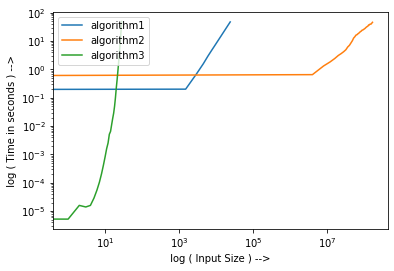

In [126]:
plot_graph_log(dict_1,dict_2,dict_3)

### Regular graph comparision for the 3 algorithms

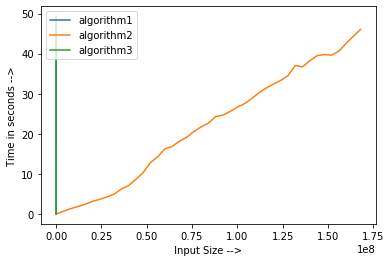

In [129]:
plot_graph(dict_1,dict_2,dict_3)